In [4]:
import time
import os


import tensorflow
import tensorflow.keras

# hyper parameter tuning with keras tuner
!pip install keras-tuner --upgrade

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from kerastuner.tuners import RandomSearch


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
print(tensorflow.__version__)

# inside tensor flow we have keras 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.9.2


In [5]:
data = pd.read_csv("/content/aps_data.csv")
data.head()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,6,0,0,0,0,0,0,0,0,...,26,8,26,52,0,0,0,0,0,0
1,neg,90,0,0,66,0,0,0,0,0,...,1268,526,554,300,118,260,0,0,0,0
2,neg,30,na,16,14,0,0,0,0,0,...,480,84,74,50,46,0,0,0,0,0
3,neg,444,na,14,12,0,0,0,0,0,...,1614,1144,3598,2460,1258,8524,110,0,0,0
4,neg,82,na,12,10,0,0,0,0,1464,...,1010,132,310,56,92,1292,0,0,0,0


In [6]:
data.isnull().sum().sum()

0

In [7]:
data = data.replace("na", np.nan)

In [8]:
pd.options.display.max_rows = 1000
data.isnull().sum()

class        0
aa_000       0
ab_000    3849
ac_000     308
ad_000    1236
ae_000     224
af_000     224
ag_000      58
ag_001      58
ag_002      58
ag_003      58
ag_004      58
ag_005      58
ag_006      58
ag_007      58
ag_008      58
ag_009      58
ah_000      60
ai_000      56
aj_000      56
ak_000     384
al_000      65
am_0        56
an_000      65
ao_000      53
ap_000      65
aq_000      53
ar_000     242
as_000      56
at_000      56
au_000      56
av_000     224
ax_000     224
ay_000      58
ay_001      58
ay_002      58
ay_003      58
ay_004      58
ay_005      58
ay_006      58
ay_007      58
ay_008      58
ay_009      58
az_000      58
az_001      58
az_002      58
az_003      58
az_004      58
az_005      58
az_006      58
az_007      58
az_008      58
az_009      58
ba_000      61
ba_001      61
ba_002      61
ba_003      61
ba_004      61
ba_005      61
ba_006      61
ba_007      61
ba_008      61
ba_009      61
bb_000      60
bc_000     243
bd_000     243
be_000    

In [9]:
pd.DataFrame(data.isnull().sum().sort_values(ascending = False)).rename(columns=({0:"null_value_count"}))

,null_value_count
br_000,4105
bq_000,4043
bp_000,3960
ab_000,3849
cr_000,3849
bo_000,3832
bn_000,3631
bm_000,3273
bl_000,2234
bk_000,1880


In [10]:
for feature in [feature for feature in data.columns if feature not in  ['class']]:
  data[feature] = data[feature].fillna(data[feature].median())

In [11]:
data.isnull().sum().sum()

0

In [12]:
x=data.drop('class',axis=1)
y=data['class']

In [13]:
x.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 170 columns):
 #    Column  Non-Null Count  Dtype 
---   ------  --------------  ----- 
 0    aa_000  5000 non-null   int64 
 1    ab_000  5000 non-null   object
 2    ac_000  5000 non-null   object
 3    ad_000  5000 non-null   object
 4    ae_000  5000 non-null   object
 5    af_000  5000 non-null   object
 6    ag_000  5000 non-null   object
 7    ag_001  5000 non-null   object
 8    ag_002  5000 non-null   object
 9    ag_003  5000 non-null   object
 10   ag_004  5000 non-null   object
 11   ag_005  5000 non-null   object
 12   ag_006  5000 non-null   object
 13   ag_007  5000 non-null   object
 14   ag_008  5000 non-null   object
 15   ag_009  5000 non-null   object
 16   ah_000  5000 non-null   object
 17   ai_000  5000 non-null   object
 18   aj_000  5000 non-null   object
 19   ak_000  5000 non-null   object
 20   al_000  5000 non-null   object
 21   am_0    5000 non-null   object
 22 

In [14]:
y=pd.get_dummies(y,drop_first=True)

In [15]:
scaler = StandardScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
x_train.shape

(4000, 170)

In [17]:
classifier = Sequential()
classifier.add(Dense(units=10, kernel_initializer='he_uniform',activation = 'relu',input_dim=170))

classifier.add(Dense(units=10, kernel_initializer='he_uniform',activation = 'relu'))

classifier.add(Dense(units=1, kernel_initializer='glorot_uniform',activation = 'sigmoid'))

In [18]:
classifier.compile(optimizer='adam', loss= 'binary_crossentropy',metrics=['accuracy'])
classifier.summary("")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,831
Trainable params: 1,831
Non-trainable params: 0
_________________________________________________________________


In [19]:
model_history = classifier.fit(x_train,y_train,batch_size=10,epochs=30,validation_split=0.25)

Epoch 1/30
300/300 [==============================] - 3s 3ms/step - loss: 0.3114 - accuracy: 0.9220 - val_loss: 0.1089 - val_accuracy: 0.9790
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9807 - val_loss: 0.0581 - val_accuracy: 0.9820
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0470 - accuracy: 0.9847 - val_loss: 0.0505 - val_accuracy: 0.9830
Epoch 4/30
300/300 [==============================] - 1s 4ms/step - loss: 0.0334 - accuracy: 0.9880 - val_loss: 0.0484 - val_accuracy: 0.9840
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0297 - accuracy: 0.9900 - val_loss: 0.0464 - val_accuracy: 0.9830
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0245 - accuracy: 0.9913 - val_loss: 0.0470 - val_accuracy: 0.9870
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.0245 - accuracy: 0.9920 - val_loss: 0.0464 - val_accuracy: 0.9860
Epoch 

In [20]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

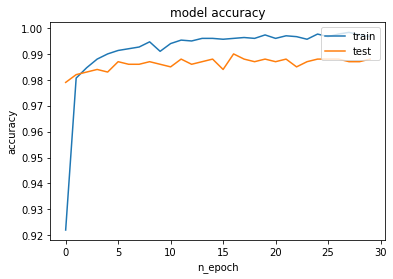

In [21]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

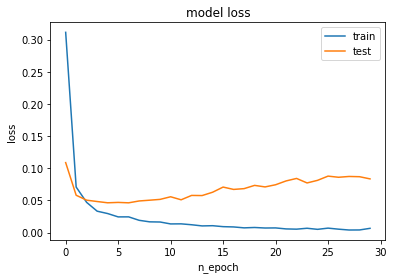

In [22]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('n_epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [23]:
y_pred = classifier.predict(x_test)

32/32 [==============================] - 0s 1ms/step


In [24]:
y_pred = y_pred > 0.5

In [25]:
confusion_matrix(y_test,y_pred)

array([[978,   8],
       [  7,   7]])

In [26]:
def build_model(hp):
  model = Sequential()
  model.add(Dense(units=32, kernel_initializer='he_uniform',activation = 'relu',input_dim=170))

  model.add(Dense(units=32, kernel_initializer='he_uniform',activation = 'relu'))

  model.add(Dense(units=1, kernel_initializer='glorot_uniform',activation = 'sigmoid'))

  optimizer = hp.Choice("optimizer",values=["adam","rmsprop",'adadelta',"sgd"])
  model.compile(optimizer= optimizer,loss="binary_crossentropy", metrics=["accuracy"])

  return model

  

In [27]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5, directory='project',project_name='aps-fault')

In [28]:
tuner.search(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.9929999709129333

Best val_accuracy So Far: 0.9929999709129333
Total elapsed time: 00h 00m 09s


In [29]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'rmsprop'}

In [30]:
mymodel = tuner.get_best_models(num_models=1)[0]

In [31]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                5472      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [32]:
def saveModel_Path(model_dir="Saved_Models"):
  os.makedirs(model_dir, exist_ok=True)
  filename = time.strftime("MODEL_%Y_%m_%d_%H_%M_%S_.h5")
  model_path= os.path.join(model_dir,filename)
  return model_path

In [33]:
classifier.save(saveModel_Path())

In [34]:
def build_model(hp):
  model = Sequential()
  for i in range(hp.Int('num_layers',2,20)):
    model.add(Dense(units=hp.Int('units_'+str(i), min_value=32, max_value=512, step=32), activation='relu'))
  model.add(Dense(1,activation='sigmoid'))
  model.compile(optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [35]:
tuner = RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='project1',project_name='aps-fault-1')

In [36]:
tuner.search(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.9929999709129333

Best val_accuracy So Far: 0.9950000047683716
Total elapsed time: 00h 00m 20s


In [37]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 10,
 'units_0': 416,
 'units_1': 96,
 'learning_rate': 0.001,
 'units_2': 32,
 'units_3': 32,
 'units_4': 32,
 'units_5': 32,
 'units_6': 32,
 'units_7': 32,
 'units_8': 32,
 'units_9': 32}

In [38]:
mymodel1 = tuner.get_best_models(num_models=1)[0]

In [39]:
mymodel1.summary()

ValueError: ignored